# Лабораторная работа 6

## Анализ и прогнозирование временного ряда.

Цель лабораторной работы: изучение основных методов анализа и прогнозирование временных рядов.

## Задание:

Выберите набор данных (датасет) для решения задачи прогнозирования временного ряда. Визуализируйте временной ряд и его основные характеристики. Разделите временной ряд на обучающую и тестовую выборку. Произведите прогнозирование временного ряда с использованием как минимум двух методов. Визуализируйте тестовую выборку и каждый из прогнозов. Оцените качество прогноза в каждом случае с помощью метрик.

Задача прогнозирования временного ряда может быть сформулирована как поиск модели M: Входными данными модели, на которых она обучается, являются известные значения временного ряда y1...yi−1. Также на вход модели могут поступать гиперпараметры H. Выходными данными модели являются прогнозируемые значения временного ряда yi...yi+k, где k - горизонт прогноза. Существует вариант постановки задачи, в которой значение yi зависит не только от предыдущих значений y, но и от матрицы X, но такую постановку мы детально не рассматриваем. Горизонт прогноза - это количество временных интервалов, на глубину которых выполняется прогноз. Как правило, составляет не более 1/3 от длины временного ряда. С точки зрения горизонта прогноза, прогнозы делятся на:

краткосрочные;
среднесрочные;
долгосрочные. Метриками оценки качеcтва прогнозирования обычно являются регрессионные метрики (MAE, MSE, ...).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('./IPL 2022 Batters.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
data

,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
Player,,,,,,,,,,,
Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51
...,...,...,...,...,...,...,...,...,...,...,...
Fazalhaq Farooqi,3,1,1,2,2*,-,8,25.00,0,0,0
Jagadeesha Suchith,5,2,0,2,2,1,8,25.00,0,0,0
Tim Southee,9,5,1,2,1*,0.5,12,16.66,0,0,0


## Визуализация временного ряда и его основных характеристик

In [ ]:

data.shape

(162, 11)

In [ ]:
data.dtypes

In [ ]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Mat - 0
Inns - 0
NO - 0
Runs - 0
HS - 0
Avg - 0
BF - 0
SR - 0
100 - 0
50 - 0
4s - 0


In [ ]:
# Основные статистические характеристки набора данных
data.describe()

,Mat,Inns,NO,Runs,BF,SR,100,50,4s
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,9.160494,7.141975,1.586420,142.296296,106.061728,120.406235,0.049383,0.679012,12.450617
std,5.047493,4.816982,1.819989,161.252161,114.571234,45.192799,0.366322,1.172428,15.314529
min,1.000000,1.000000,0.000000,1.000000,1.000000,16.660000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000,14.500000,14.000000,94.082500,0.000000,0.000000,1.000000
50%,9.500000,7.000000,1.000000,65.000000,47.500000,123.620000,0.000000,0.000000,5.000000
75%,14.000000,11.000000,2.000000,241.500000,176.500000,144.247500,0.000000,1.000000,21.000000
max,17.000000,17.000000,10.000000,863.000000,579.000000,400.000000,4.000000,5.000000,83.000000


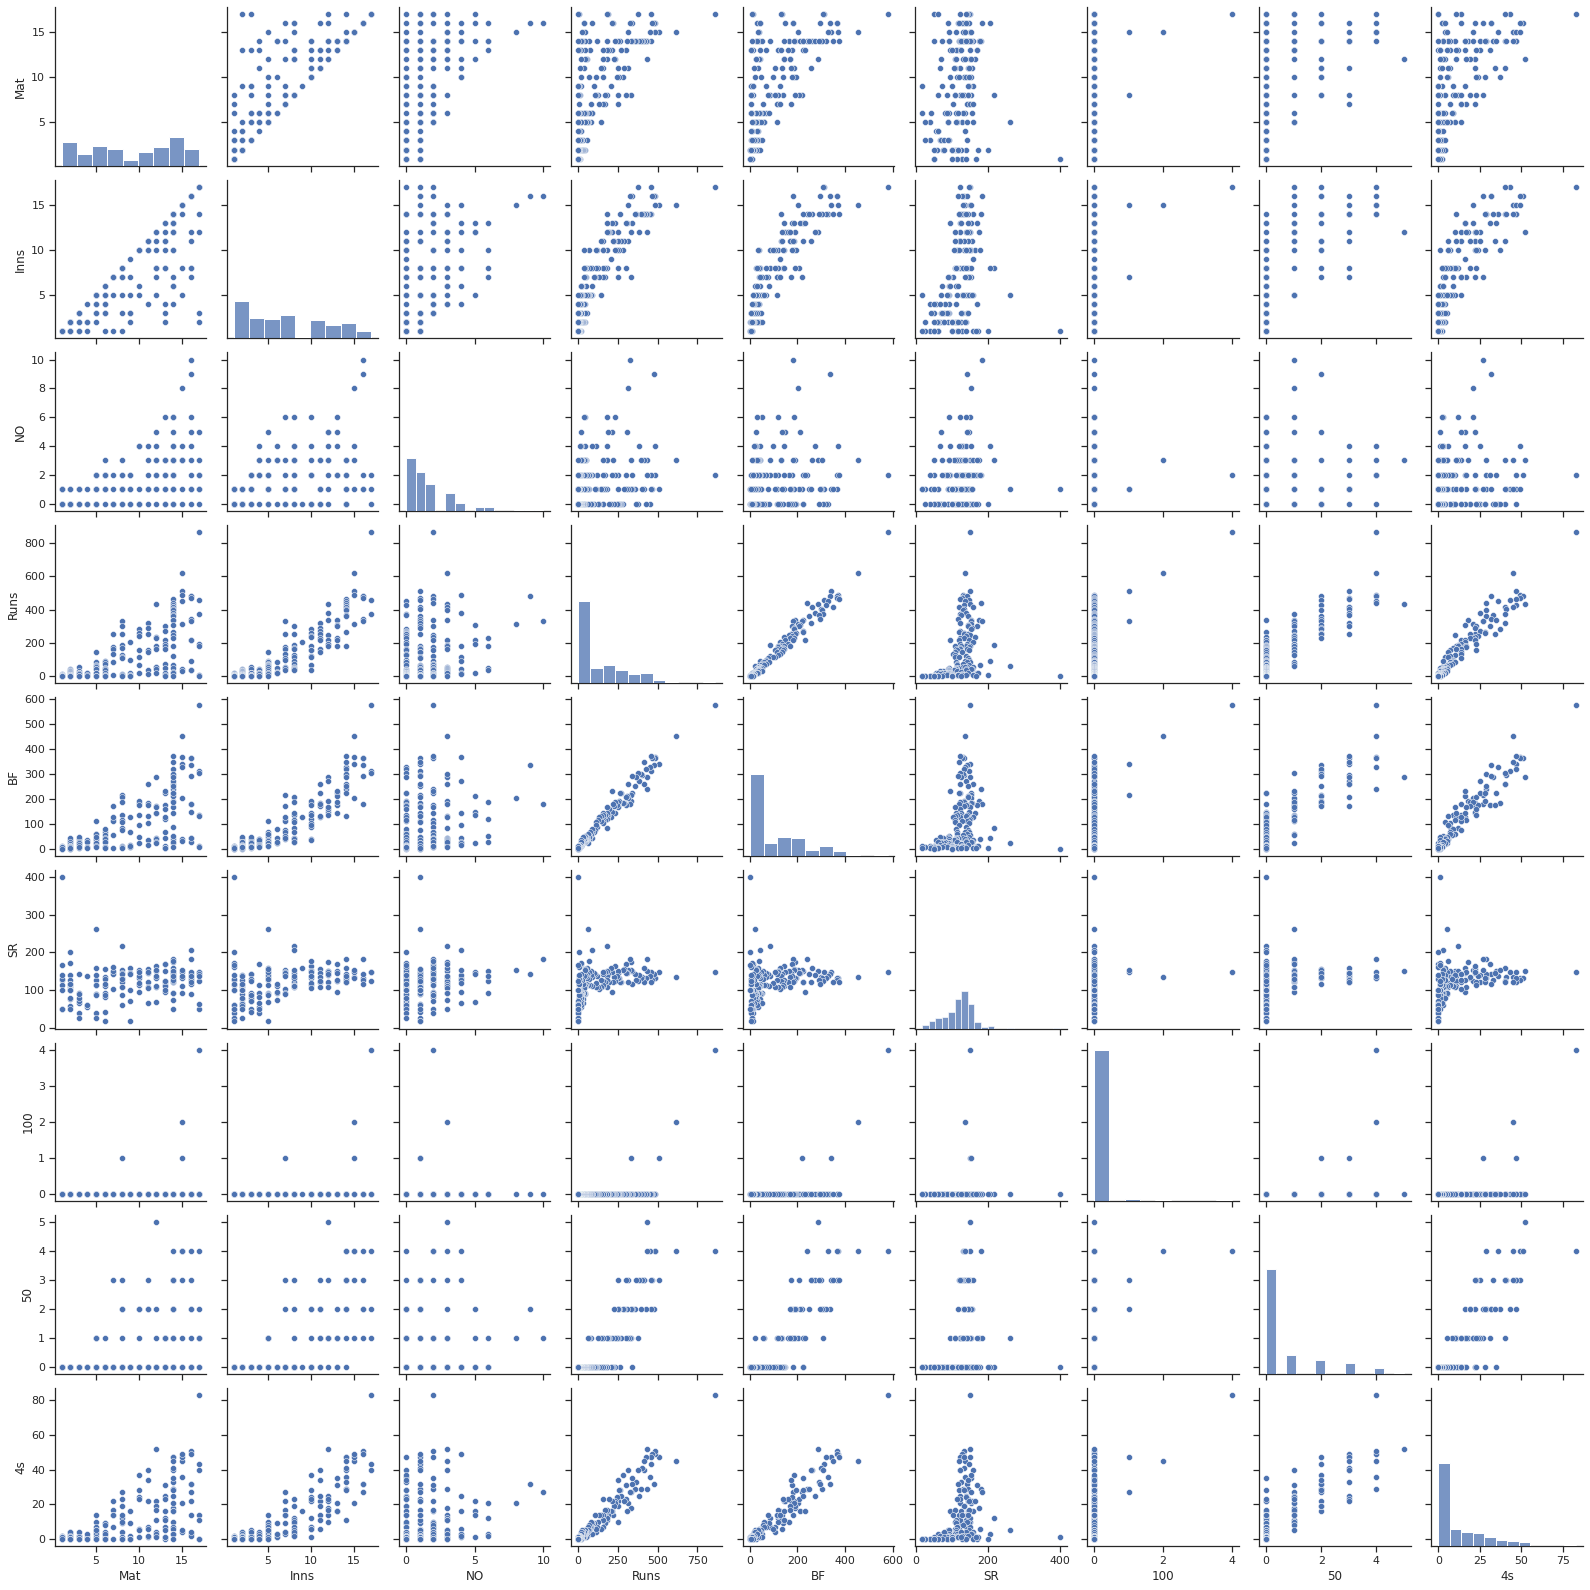

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr()

,Mat,Inns,NO,Runs,BF,SR,100,50,4s
Mat,1.000000,0.812187,0.540736,0.621380,0.624197,0.178601,0.160287,0.454827,0.572930
Inns,0.812187,1.000000,0.407033,0.880307,0.884458,0.336176,0.221278,0.682295,0.831160
NO,0.540736,0.407033,1.000000,0.224061,0.186919,0.168349,0.030824,0.097495,0.121716
Runs,0.621380,0.880307,0.224061,1.000000,0.986888,0.350650,0.461250,0.865277,0.963215
BF,0.624197,0.884458,0.186919,0.986888,1.000000,0.283462,0.434576,0.857797,0.960353
SR,0.178601,0.336176,0.168349,0.350650,0.283462,1.000000,0.077074,0.259396,0.309171
100,0.160287,0.221278,0.030824,0.461250,0.434576,0.077074,1.000000,0.340836,0.438869
50,0.454827,0.682295,0.097495,0.865277,0.857797,0.259396,0.340836,1.000000,0.858740
4s,0.572930,0.831160,0.121716,0.963215,0.960353,0.309171,0.438869,0.858740,1.000000


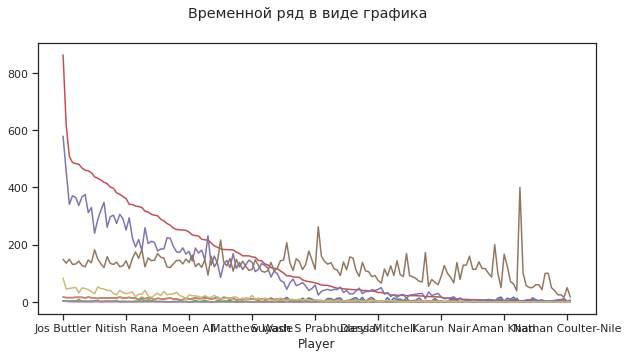

In [ ]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
data.plot(ax=ax, legend=False)
plt.show()

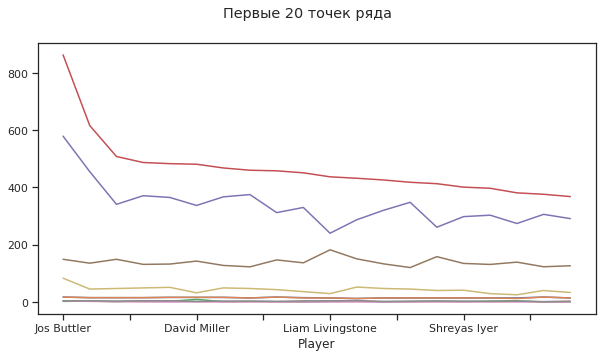

In [ ]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Первые 20 точек ряда')
data[:20].plot(ax=ax, legend=False)
plt.show()